## Thermodynamic integration for dummies
Write a MD or Langevin code sampling the canonical probability distribution at
a temperature T=1 of a three-dimensional potential of the form

V(x,y,z) = 10 (x-2)^2 + y^2 + 5 (z-1)^2

(x-2)^2 + y^2 + 5 (z-1)^2

x^2+y^2+5(z-1)^2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from scipy.optimize import curve_fit

In [2]:
def gradient(x,y,z):
    
    #gradx=20*(x-2)
    #gradx=2*(x-2)
    gradx=2*x
    
    grady=2*y
    gradz=10*(z-1)
    return [gradx,grady,gradz]

In [3]:
njit(fastmath=True)
def run(D,dt,N,q=[0,0,0],kT=1):#,seed=0):
    #seed=0
    #np.random.seed(seed)
    traj=[]
    traj.append(q)
    
    for i in range(N):
        grad=gradient(q[0],q[1],q[2])
        rando=[np.random.normal(),np.random.normal(),np.random.normal()]
        q=q-np.multiply(grad,D/kT*dt)+np.multiply(rando,np.sqrt(2*D*dt))
        ##[q[0]-D*grad[0]*dt+np.sqrt(2*D*dt)*np.random.normal(),q[1]-D*grad[1]*dt+np.sqrt(2*D*dt)*np.random.normal(),q[2]-D*grad[2]*dt+np.sqrt(2*D*dt)*np.random.normal()
        traj.append(q)
        # traj.append((i*dt),q)
    return np.array(traj)

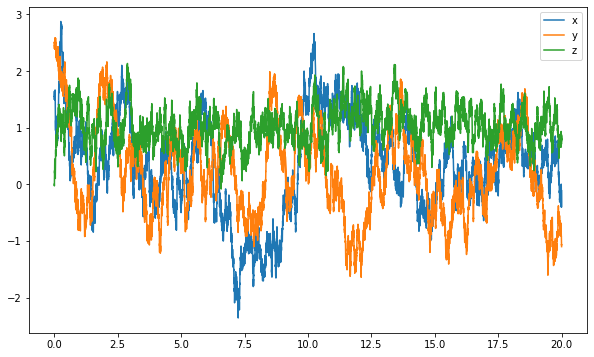

In [4]:
dt=0.001
Tmax=20
q0=[1.5,2.5,0]
N=round(Tmax/dt)
D=1
kT=1

time=np.linspace(0,Tmax,N+1)
traj=run(D,dt,N,q0,kT)
plt.figure(figsize=(10,6))
plt.plot(time,traj[:,0],label='x')
plt.plot(time,traj[:,1],label='y')
plt.plot(time,traj[:,2],label='z')
plt.legend()

1. Compute the free energy F (s) as a function of the collective variable s = x^2 + y^2 by thermodynamic integration.

In [5]:
def gradient2(r,theta,z):
    cos=np.cos(theta)
    sin=np.sin(theta)
    
    #gradtheta=2*r*sin*(20-9*r*cos)
    gradtheta=4*r*sin
    #gradtheta=0
    
    gradz=10*(z-1)
    
    #Q=-(10*r*cos*(r*cos-2)+(r*sin)**2)/r**2
    Q=-(r*cos*(r*cos-2)+(r*sin)**2)/r**2
    #Q=-1
    
    return [gradtheta,gradz,Q]

In [6]:
njit(fastmath=True) ## why it gives me error?
def run2(D,dt,N,r,thetaz=[0,0],kT=1):#,seed=0):      thetaz=[theta,z]
    #seed=0
    #np.random.seed(seed)
    traj=[]
    Qs=[]
    grad=[0,0]
    traj.append(thetaz)
    
    for i in range(N):
        [grad[0],grad[1],Q]=gradient2(r,thetaz[0],thetaz[1])
        Qs.append(Q)
        rando=[np.random.normal(),np.random.normal()]
        thetaz[0]=thetaz[0]-(grad[0]/r)*D/kT*dt+np.sqrt(2*D*dt/r)*rando[0]
        thetaz[1]=thetaz[1]-grad[1]*D/kT*dt+np.sqrt(2*D*dt)*rando[1]
        traj.append([thetaz[0],thetaz[1]])
        #traj.append(thetaz)
        #print(thetaz)
        # traj.append((i*dt),q)
    return np.array(traj),np.array(Qs)

[[ 0.14502658  1.02178494]
 [-0.0319379   0.1311556 ]
 [ 0.03403994  0.20534456]
 ...
 [ 0.19745666  1.04817979]
 [ 0.16440672  0.99180028]
 [ 0.14502658  1.02178494]]
3.1660222694576348
1.0303768265243125


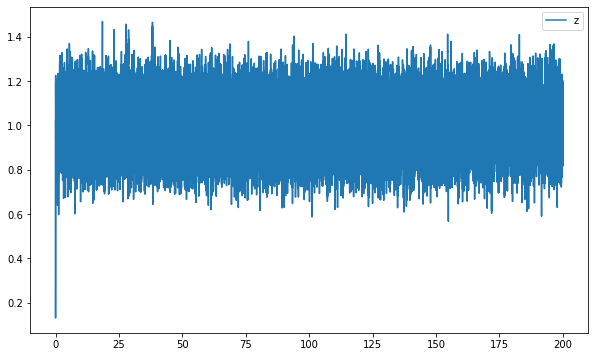

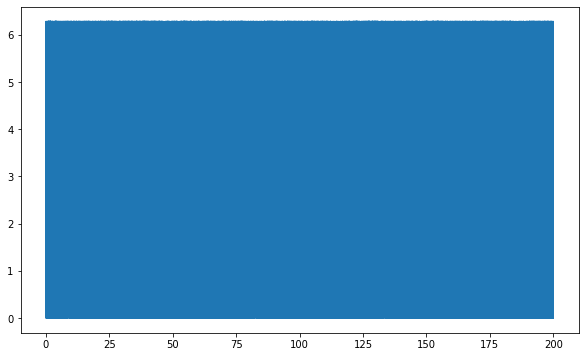

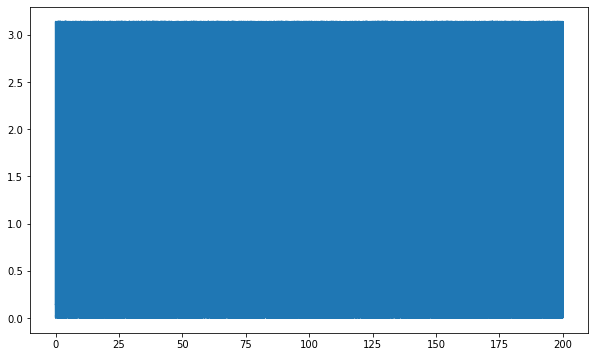

In [7]:
dt=0.001
Tmax=200
#q0=[1.5,2.5,0]
r=2
N=round(Tmax/dt)
D=1
kT=0.1
thetaz=[0,0]

time=np.linspace(0,Tmax,N+1)
[traj,Qs]=run2(D,dt,N,r,thetaz,kT)
plt.figure(figsize=(10,6))
plt.plot(time,traj[:,1],label='z')
#plt.plot(time,np.mod(traj[:,0],2*np.pi),label='theta')
#plt.plot(time,traj[:,2],label='z')
plt.legend()
print(traj)

plt.figure(figsize=(10,6))
plt.plot(time,np.mod(traj[:,0],2*np.pi),label='theta')
print(np.mean(np.mod(traj[:,0],2*np.pi)))
print(np.arctan(5/3))

plt.figure(figsize=(10,6))
plt.plot(time,np.mod(traj[:,0],np.pi),label='theta')

[-0.         -0.00050997 -0.0005793  ... -0.01986441 -0.01943131
 -0.01348437]
-0.006529129651796024


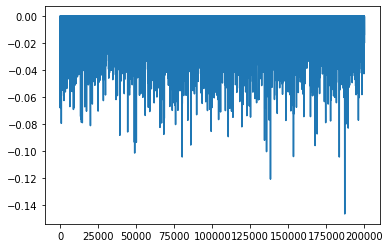

In [8]:
print(Qs)
plt.plot(Qs)
Qav=np.mean(Qs)
print(Qav)

In [9]:
rs=np.arange(0.1,4,0.1)
dt=0.001
Tmax=200
N=round(Tmax/dt)
D=1
kT=1
thetaz=[0,0]

Qavs=[]
#rs=np.arange(0.1,9.25,0.05)
time=np.linspace(0,Tmax,N+1)
for r in rs:
    [traj,Qs]=run2(D,dt,N,r,thetaz,kT)
    Qavs.append(np.mean(Qs))

#print(Qavs)


[3.0953395905558434, 2.545884131346704, 2.501126990740446, 2.0286516979461036, 1.653222444760269, 1.5248180001625367, 1.2643799293022953, 1.0315788873888525, 0.920048933494646, 0.7212365814369635, 0.5796404649369635, 0.4704092716913598, 0.3453633683335042, 0.2980609405152981, 0.22080047415100057, 0.13326186947483296, 0.08469159582492135, 0.03415342286961561, -0.02121335947323685, -0.06545815167302652, -0.10437452597882717, -0.14580073781286831, -0.18286533007895306, -0.2104813418039078, -0.24146933686749608, -0.2697456684314636, -0.29539429800674816, -0.3142453743847991, -0.34245152470235235, -0.3600438285401357, -0.37993323891722297, -0.40045982911354144, -0.41805206679251156, -0.43454365777266807, -0.45000111023606937, -0.46465456293916896, -0.4785514995882341, -0.491334994384975, -0.5034460269578607]


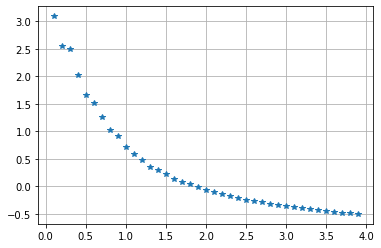

In [10]:
plt.plot(rs,Qavs,'*') 
plt.grid()
print(Qavs)

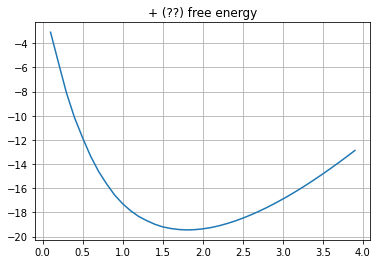

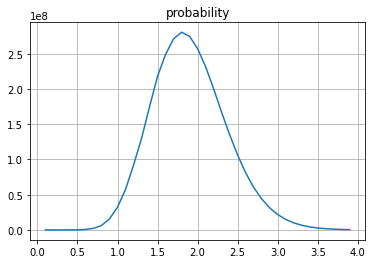

In [11]:
F=np.cumsum(Qavs)
plt.plot(rs,-F)
plt.title('+ (??) free energy')
plt.grid()

plt.figure()
plt.plot(rs,np.exp(F))
plt.title('probability')
plt.grid()